In [46]:
# In response to referee question
# Does Figure 2 depends on number of data points?
# Answer = yes

9.354536950420954

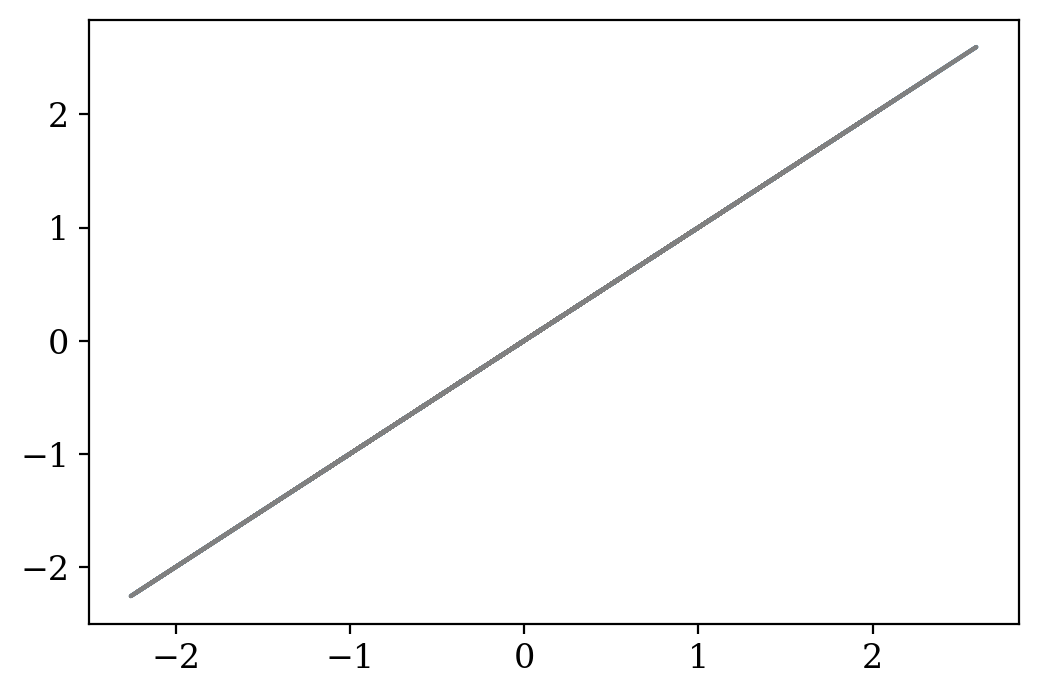

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# linear function to fit
def linfunc(x, a, b):
    return a*x + b

# draw n data points from a distribtuion
# here we imagine for example source galaxies distributed in redshift
# following a gaussian distirbution in redshift
# start with large number here first
ndata=100
#x=np.random.uniform(low=-1, high=1.0, size=ndata)
x=np.random.normal(size=ndata)

# True values are zero
ytrue=np.zeros(ndata)

# biased values have a slope of 1
ybias =  x

plt.plot(x,ybias)

# systematic error is difference between ybias and ytrue(=0)
sigma_sys = np.std(ybias)

# In this set up sigma_sys=1
sigma_sys = 1

#plt.hist(ybias,bins=20)

# Give data points errors. Here errors are set to sigma_sys
# distirbution of sigma_sys depends on distirbution of data points along the x-axis
errs = np.ones(ndata)*sigma_sys

popt, pcov = optimize.curve_fit(linfunc, x , ybias, sigma=errs,absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))       
p = np.poly1d(popt)
           
plt.plot(x,p(x),'gray')
            
beta= np.round(popt[0], 4)
betaerr=np.round(perr[0], 4)
betasig = np.abs(beta/betaerr)
betasig